# Import Data and Library

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
import pandas as pd

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# y_train = to_categorical(y_train)

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


11501568/11490434 [==============================] - 0s 0us/step


# Print Shape Of input data

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

# Add one dimension to dataset

In [ ]:
image_size= 28
x_train_new = np.array(x_train).reshape(-1, image_size , image_size , 1)
x_test_new = np.array(x_test).reshape(-1, image_size , image_size , 1)
x_train_new.shape[1:]

(28, 28, 1)

# Make CNN model

In [ ]:
model = tf.keras.models.Sequential()
## first cnn layer
model.add(tf.keras.layers.Conv2D(64, (3,3), input_shape = x_train_new.shape[1:]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# second cnn layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_13 (Dense)             (None, 128)             

# Train the model

In [ ]:
history = model.fit( x_train_new, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0111 - accuracy: 0.9966
Epoch 2/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0113 - accuracy: 0.9963
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0112 - accuracy: 0.9961
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0083 - accuracy: 0.9974
Epoch 5/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0086 - accuracy: 0.9972


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


# Evaluate Single dataset

In [ ]:
predictions = model.predict(x_test_new)
print(np.argmax(predictions[1335]))

2


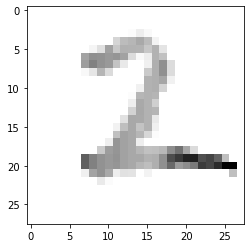

In [ ]:
plt.imshow(x_test[1335],cmap=plt.cm.binary)
plt.show()

# Evaluate Test set

In [ ]:
y_pred = model.predict(x_test_new)
# y_pred = np.argmax(y_pred);
y_pred=np.apply_along_axis(np.argmax, 1, y_pred)

# Buid Confusion Metrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 973    1    2    0    1    0    2    1    0    0]
 [   0 1126    0    2    1    1    3    1    1    0]
 [   0    0 1025    5    0    0    0    2    0    0]
 [   0    0    0 1007    0    3    0    0    0    0]
 [   1    1    2    0  970    1    2    2    0    3]
 [   1    0    0   11    0  878    2    0    0    0]
 [   1    2    1    0    1    4  949    0    0    0]
 [   0    0    4    5    0    0    0 1019    0    0]
 [   3    0    8    7    1    9    0    3  940    3]
 [   0    0    0    2    5    8    0    2    3  989]]


0.9876

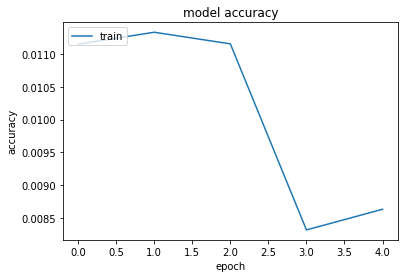

In [ ]:
# plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
